# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.

### Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

### Importing Dataset

In [2]:
airlines = pd.read_excel('EastWestAirlines.xlsx')

In [3]:
airlines.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [4]:
airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)

In [5]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airlines = airlines.drop(columns='ID#')

In [7]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
airlines.rename(columns={'Award?':'Award'},inplace=True)

In [9]:
airlines.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [11]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [12]:
airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [13]:
airlines_main = airlines.copy()

## Columns Information

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [14]:
airlines.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


##### Balance is right-skewed data since mean > median
##### Bonus_miles is right-skewed data since mean > median
##### Bonus_trans can be assumed as near-normal distribution there might be outliers due to wide range of the min max values
##### Days_since_enroll can be assumed as near-normal distribution



##### Let's scale the data

In [15]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
ss = StandardScaler()

In [17]:
airlines_scaled = pd.DataFrame(ss.fit_transform(airlines),columns=airlines.columns)

In [18]:
def column_boxplots(df,list_cols):
    for i in list_cols:    
        sns.boxplot(x=i, data = df)
        plt.show()

In [19]:
list_cols = ['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']

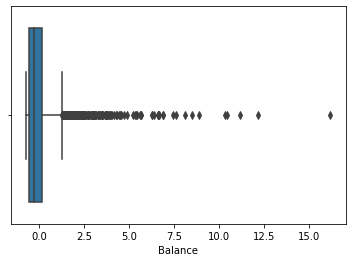

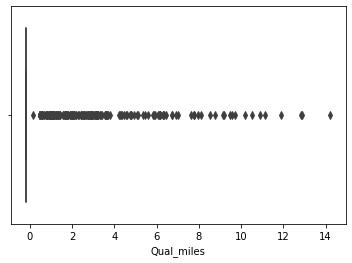

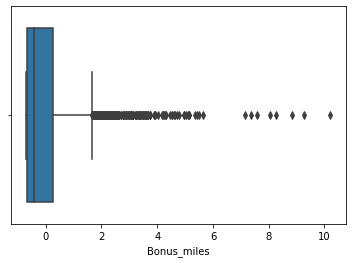

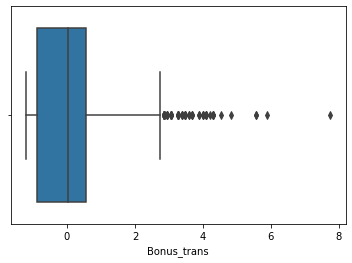

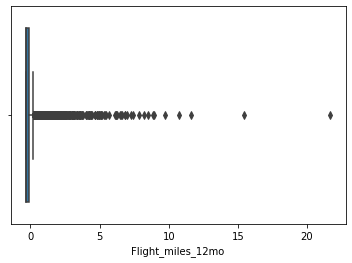

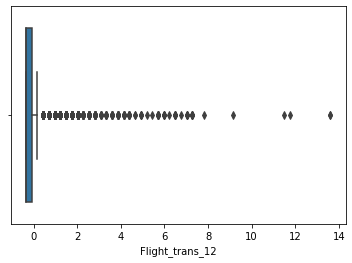

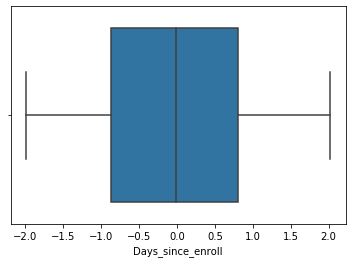

In [20]:
column_boxplots(airlines_scaled,list_cols)

In [21]:
def outliers_to_median_values(df,column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=df)
    plt.show()

In [22]:
outliers = ['Balance','Bonus_miles','Bonus_trans']

Distribution after outlier removal


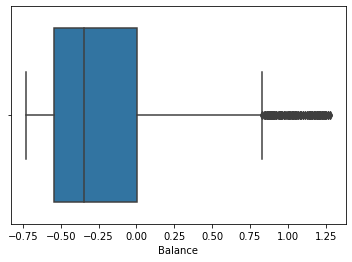

Distribution after outlier removal


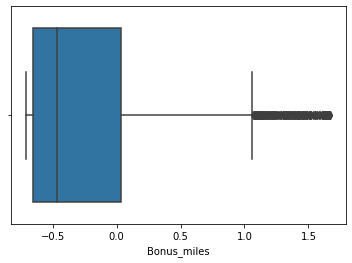

Distribution after outlier removal


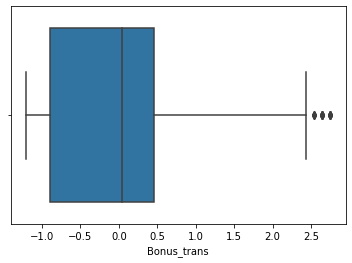

In [23]:
for i in outliers:
    outliers_to_median_values(airlines_scaled,i)

## Hierarchical Approach

In [24]:
ward_link = linkage(airlines_scaled,method='ward',metric='euclidean')

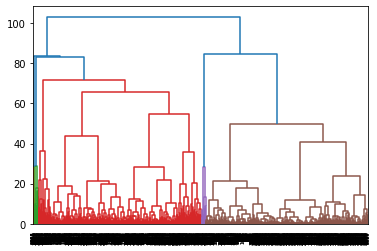

In [25]:
warddend = dendrogram(ward_link)

In [26]:
clusters = fcluster(ward_link,3,criterion='maxclust')
clusters

array([3, 3, 3, ..., 1, 3, 3], dtype=int32)

In [27]:
airlines['clusters'] = clusters

In [28]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [29]:
airlines_clust = airlines.groupby('clusters').mean()
airlines_clust

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
1,103203.316493,283.777613,2.793462,1.000000,1.024269,28974.016345,15.537890,823.315998,2.420010,4643.020307,0.725111
2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,42851.068663,1.221993,1.314920,1.000000,1.000000,4869.405266,7.367579,78.696438,0.264326,3575.217863,0.000000


#### Cluster-1
This group of people have travelled around 100,000 miles to be eligible for award travel, hence most of the people in this group had a free flight. Qualifying miles for this group for top-flight status is 283. From cc1_miles, we can say that this group used the freq. flyer credit card the most. Also this group stands highest in earning bonus miles by making non-flight bonus transactions. From the data it is inferred that this group is likely to contain Businessmen who would frequently travel to places around for Business purposes.

Cluster-2
This group of people have travelled around 68,000 miles to be eligible for award travel, qualifying miles for this group for top-flight status is 23. From cc2_miles, we can say that this group used rewards credit card the most, also Bonus_trans is highest for this group. therefore they stand in top in making non-flight transactions.This group also has the people who had an free flight travel. From the data it is inferred that this group is likely to contain High class/Tourists who would frequently travel to places around the world.

Cluster-3
This group of people have travelled around 42,000 miles to be eligible for award travel, qualifying miles for this group for top-flight status is 1. From cc1_miles, cc2_miles and cc3_miles we can say that most of the people in this group used freq. flyer credit card.This group also has no people who had an free flight travel. From the data it is inferred that this group is likely to contain Middle class people who would travel less to places via this mode of transport.

## K-Means

In [30]:
airlines_scaled = np.array(airlines_scaled)

##### Let's now go with K-means approach. Here we need to give number of clusters to the model. since we don't have any idea of how many clusters would give the best output let's try to give a range of values to as cluster numbers and calculate their inertia values based on which we can conclude the best k value for the data.

In [31]:
wss = []

In [32]:
for i in range(2,30):
    KM = KMeans(n_clusters=i)
    KM.fit(airlines_scaled)
    wss.append(KM.inertia_)

In [33]:
wss

[30756.845264566397,
 26259.820384066516,
 22599.047126069436,
 19111.897370960163,
 16487.276800676613,
 14779.406793012615,
 13040.909987745772,
 11735.819500279815,
 10780.904729477623,
 10329.486044805024,
 9832.437281320035,
 9443.341505574483,
 8948.528449822365,
 8616.815415676672,
 8180.47497461998,
 7979.157826321567,
 7729.494861695743,
 7406.512206617673,
 7135.813870455619,
 7059.908336819844,
 6806.50944868587,
 6700.708492544987,
 6490.192127992318,
 6327.665354103617,
 6198.355012832925,
 6011.066780691102,
 5986.12887812048,
 5852.228014499402]

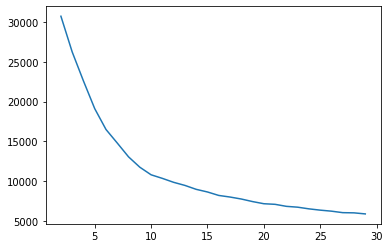

In [34]:
plt.plot(range(2,30), wss)

In [35]:
KM = KMeans(n_clusters=5)
KM.fit(airlines_scaled)

KMeans(n_clusters=5)

In [36]:
labels = KM.labels_

In [37]:
airlines['Clust_Kmeans'] = labels
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,Clust_Kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,3,1
1,19244,0,1,1,1,215,2,0,0,6968,0,3,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,3,1
3,14776,0,1,1,1,500,1,0,0,6952,0,3,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2


#### Let's now calculate silhouette score



In [38]:
silhouette_score(airlines_scaled,labels)

0.3145016108143267

In [39]:
sil_width = silhouette_samples(airlines_scaled,labels)

In [40]:
airlines['sil_width'] = sil_width

In [41]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,Clust_Kmeans,sil_width
0,28143,0,1,1,1,174,1,0,0,7000,0,3,1,0.412692
1,19244,0,1,1,1,215,2,0,0,6968,0,3,1,0.413314
2,41354,0,1,1,1,4123,4,0,0,7034,0,3,1,0.392503
3,14776,0,1,1,1,500,1,0,0,6952,0,3,1,0.415858
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,0.335463


In [42]:
airlines[airlines['sil_width']<0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,Clust_Kmeans,sil_width
12,43382,0,2,1,1,11150,20,0,0,6924,0,3,2,-0.051304
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,1,0,-0.085955
22,20584,0,1,1,1,3450,11,3450,11,6884,0,1,0,-0.069855
45,288865,967,1,1,1,23600,14,2000,4,6884,1,1,2,-0.016059
50,108137,0,1,1,1,6368,5,6368,5,6844,0,1,0,-0.036719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,134882,0,3,1,1,15717,14,0,0,1597,0,3,2,-0.080025
3897,179832,2954,3,1,1,18218,20,2500,5,1569,1,1,3,-0.003383
3946,139032,0,3,1,1,19565,17,1150,4,1481,0,3,2,-0.008662
3967,26504,0,2,1,1,10599,29,1000,7,1445,0,3,2,-0.047727


In [43]:
silhouette_samples(airlines_scaled,labels).min()

-0.20256902451476239

##### From the above analysis we can say that there are outliers which are dragging the silhouette score down. Analysing this data might help in improving it.

In [44]:
airlines_kmeans = airlines.groupby('Clust_Kmeans').mean()
airlines_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,sil_width
Clust_Kmeans,,,,,,,,,,,,,
0,172245.325444,438.485207,2.106509,1.000000,1.011834,30113.834320,25.579882,5323.946746,15.295858,4646.094675,0.798817,1.000000,0.128838
1,43953.138428,45.774672,1.117467,1.000000,1.002183,3902.523144,6.156769,187.162009,0.581223,3671.963319,0.193450,2.517031,0.399605
2,107714.704861,55.844444,3.580556,1.000000,1.029167,36673.854167,18.415972,300.552083,0.917361,4781.079861,0.594444,1.277778,0.195836
3,114012.175439,5543.333333,2.035088,1.000000,1.000000,19196.684211,12.298246,939.771930,2.824561,3872.175439,0.526316,1.000000,0.334108
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,2.000000,0.459890


Cluster-0
This group of people have travelled around 100,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 94. From cc1_miles, we can say that this group used the freq. flyer credit card the most.

Cluster-1
This group of people have travelled around 170,000 miles to be eligible for award travel, hence most of the people in this group had a free flight. Qualifying miles for this group for top-flight status is 1238. As Flight_miles_12mo is high we can say that this group has people who travel in long-distance flights.

Cluster-2
This group of people have travelled around 138,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 78. From cc3_miles & cc1_miles, we can say that this group used the Small Business credit card and freq. flyer credit card the most. Also the people in this group have earned the most bonus miles by making non-flight transactions.

Cluster-3
This group of people have travelled around 43,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 84. From the data of this group, we can say that this mostly has Middle class people who would travel less to places via this mode of transport.

Cluster-4
This group of people have travelled around 68,000 miles to be eligible for award travel. Qualifying miles for this group for top-flight status is 23. From cc2_miles, we can say that this group used the Rewards credit card the most.

## DBSCAN

In [45]:
dbscan = DBSCAN(eps=4, min_samples=12)
dbscan.fit(airlines_scaled)
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
clustered = pd.concat([airlines_main,cl],axis=1)
df2 = clustered[clustered['cluster']==-1]
df_clust = df2.groupby('cluster').mean()
print(silhouette_score(airlines_scaled,dbscan.labels_))

0.5704754310533772


In [46]:
clustered.groupby('cluster').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,,,
-1,137569.107143,936.750000,2.928571,1.071429,2.75,68943.892857,32.750000,5044.250000,11.535714,4203.928571,0.678571
0,73214.713159,140.006363,2.063120,1.000000,1.00,16804.336727,11.395266,427.111479,1.297786,4119.356325,0.368033
1,45781.714286,0.000000,1.000000,3.000000,1.00,20147.571429,16.928571,410.000000,1.714286,4137.642857,0.357143
2,77793.642857,0.000000,1.214286,2.000000,1.00,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857


Cluster-0
In Cluster 0, we find customers with moderate balances and a moderate number of miles eligible for award travel. These customers utilize their frequent flyer credit card (cc1_miles) to earn miles. They also participate in non-flight bonus transactions (Bonus_trans) and earn bonus miles (Bonus_miles). Their flight activity is characterized by a moderate number of flight miles and transactions in the past year, indicating that they are occasional travelers. With a moderate tenure in the loyalty program (Days_since_enrolled), award rates are moderate, suggesting that some customers in this group have received award flights, reflecting a moderate level of engagement with the loyalty program.

Cluster-1
Cluster 1 comprises customers with the lowest balances and a lower number of miles eligible for award travel, indicating limited spending and travel activity. They do not accumulate qualifying miles, suggesting little pursuit of Topflight status. While they have a low cc1_miles, indicating limited use of their frequent flyer credit card, they rely more on their rewards credit card (cc2_miles) compared to other clusters. These customers participate in non-flight bonus transactions (Bonus_trans) and earn bonus miles (Bonus_miles) at a moderate level, indicating some engagement with promotions. Their flight activity is limited, with a low number of flight miles and transactions in the past year. With a moderate tenure in the loyalty program (Days_since_enrolled), award rates are low, indicating that customers in this cluster are less likely to receive award flights, reflecting a lower level of engagement with the loyalty program.

Cluster-2
Cluster 2 consists of customers with moderate balances and a moderate number of miles eligible for award travel. They do not accumulate qualifying miles, indicating limited interest in achieving Topflight status. Although their use of the frequent flyer credit card (cc1_miles) is low, they rely more on their rewards credit card (cc2_miles) compared to some other clusters. These customers participate in non-flight bonus transactions (Bonus_trans) and earn bonus miles (Bonus_miles) at a moderate level, indicating some engagement with promotions. Their flight activity is moderate, with a moderate number of flight miles and transactions in the past year. With a moderate tenure in the loyalty program (Days_since_enrolled), award rates are moderate, suggesting that some customers in this group have received award flights, possibly due to their moderate engagement with the loyalty program.

Cluster-(-1) Outliers
Customers in Cluster -1 are enthusiastic travelers who actively participate in the airline's loyalty program. They maintain substantial account balances and have earned a large number of miles eligible for award travel, indicating significant spending and extensive travel. Many in this group are actively working towards achieving Topflight status by accumulating qualifying miles. They are dedicated users of their frequent flyer credit card (cc1_miles) and frequently engage in non-flight bonus transactions (Bonus_trans) to earn bonus miles, showing a strong commitment to loyalty rewards. These customers are characterized by their extensive flight activity, with a high number of flight miles and transactions in the past year, confirming their status as frequent travelers. Their long-standing membership in the loyalty program (Days_since_enrolled) reflects their strong loyalty, and most have received award flights, demonstrating their active involvement with the program.